### This notebook will perform a Time Series Analysis of Eve pvp data using ARIMA modeling.

This analysis will attempt to draw meaningful conclusions from the Beeitnam war PVP data provided on the r/eve subreddit by u/Normann_Tivianne. It's clear from the numbers posted that since the siege of 3-D began, Imperium participation is rising, while PAPI participation is falling. But what (if anything) does the past and current data predict about future participation? Using time series forecasting techniques, we can answer that question.

### Importing and prepping the data

In [116]:
import os
import pandas as pd

pwd = os.getcwd()

path = pwd + "/raw_data/"

evedata_df = pd.read_csv(path + 'evedata.csv', index_col='date', parse_dates= True)

evedata_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2020-01-06 to 2021-08-16
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   northern_conflict  85 non-null     int64  
 1   war_begins         85 non-null     int64  
 2   fwst               85 non-null     int64  
 3   m2                 85 non-null     int64  
 4   1dq_siege          85 non-null     int64  
 5   1dq_ongoing        85 non-null     int64  
 6   gsf                74 non-null     float64
 7   init               74 non-null     float64
 8   ph                 74 non-null     float64
 9   test               74 non-null     float64
 10  brave              74 non-null     float64
 11  nc                 74 non-null     float64
 12  eve chars          74 non-null     float64
 13  imperium           74 non-null     float64
 14  log_imperium       74 non-null     float64
 15  legacy             74 non-null     float64
 16  log_lega

In [117]:
evedata_df

,northern_conflict,war_begins,fwst,m2,1dq_siege,1dq_ongoing,gsf,init,ph,test,...,other papi,log_otherpapi,fraternity,fire,slicy,eve kms,pl,wh space,imperium wo caps,papi wo caps
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,0,0,0,0,0,0,2268.0,703.0,1505.0,1284.0,...,2646.0,3.422590,1628.0,801.0,217.0,100760.0,279.0,4501.0,3874.0,7374.0
2020-01-13,0,0,0,0,0,0,2242.0,714.0,1631.0,1138.0,...,2311.0,3.363800,1333.0,772.0,206.0,101662.0,201.0,4881.0,3886.0,6958.0
2020-01-20,0,0,0,0,0,0,2223.0,707.0,1715.0,1263.0,...,2547.0,3.406029,1568.0,802.0,177.0,102620.0,208.0,4910.0,3848.0,7493.0
2020-01-27,0,0,0,0,0,0,1583.0,536.0,1445.0,852.0,...,2517.0,3.400883,1664.0,715.0,138.0,89349.0,178.0,4156.0,3078.0,6639.0
2020-02-03,0,0,0,0,0,0,2317.0,646.0,1799.0,1050.0,...,3066.0,3.486572,2090.0,807.0,169.0,101864.0,243.0,4466.0,3935.0,7842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-19,0,0,0,0,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-26,0,0,0,0,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-02,0,0,0,0,0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
imp_df = evedata_df["imperium"].iloc[0:74]
legacy_df = evedata_df["legacy"].iloc[0:74]
panfam_df = evedata_df["panfam"].iloc[0:74]
papi_df = evedata_df["papi_total"].iloc[0:74]
impsub_df = evedata_df["imperium wo caps"].iloc[0:74]
papisub_df = evedata_df["papi wo caps"].iloc[0:74]


In [119]:
imp_df.index

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27',
               '2020-02-03', '2020-02-10', '2020-02-17', '2020-02-24',
               '2020-03-02', '2020-03-09', '2020-03-16', '2020-03-23',
               '2020-03-30', '2020-04-06', '2020-04-13', '2020-04-20',
               '2020-04-27', '2020-05-04', '2020-05-11', '2020-05-18',
               '2020-05-25', '2020-06-01', '2020-06-08', '2020-06-15',
               '2020-06-22', '2020-06-29', '2020-07-06', '2020-07-13',
               '2020-07-20', '2020-07-27', '2020-08-03', '2020-08-10',
               '2020-08-17', '2020-08-24', '2020-08-31', '2020-09-07',
               '2020-09-14', '2020-09-21', '2020-09-28', '2020-10-05',
               '2020-10-12', '2020-10-19', '2020-10-26', '2020-11-02',
               '2020-11-09', '2020-11-16', '2020-11-23', '2020-11-30',
               '2020-12-07', '2020-12-14', '2020-12-21', '2020-12-28',
               '2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
      

In [120]:
imp_df

date
2020-01-06    4180.0
2020-01-13    4137.0
2020-01-20    4134.0
2020-01-27    3284.0
2020-02-03    4160.0
               ...  
2021-05-03    4440.0
2021-05-10    4405.0
2021-05-17    4569.0
2021-05-24    4148.0
2021-05-31    4469.0
Name: imperium, Length: 74, dtype: float64

### Visualizing the data

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

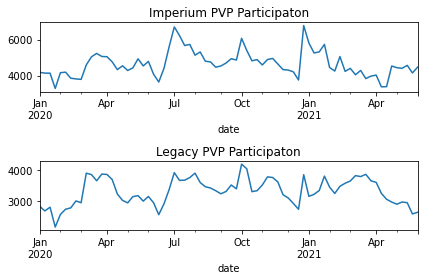

In [68]:
fig, axes = plt.subplots(2)

imp_df.plot(y = 'imperium', title = "Imperium PVP Participaton", ax=axes[0])
legacy_df.plot(y = 'legacy', title = "Legacy PVP Participaton", ax=axes[1])

plt.tight_layout()

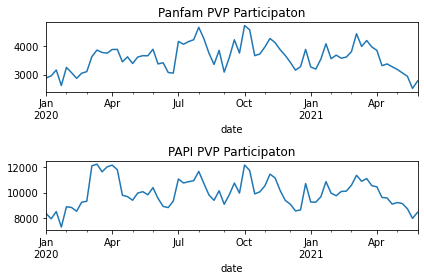

In [69]:
fig, axes = plt.subplots(2)

panfam_df.plot(y = 'panfam', title = "Panfam PVP Participaton", ax=axes[0])
papi_df.plot(y = 'papi_total', title = "PAPI PVP Participaton", ax=axes[1])

plt.tight_layout()

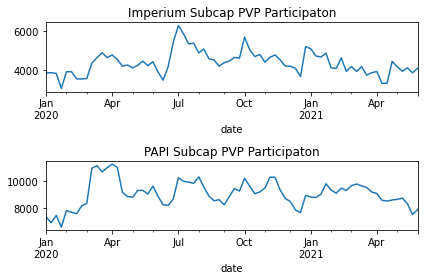

In [70]:
fig, axes = plt.subplots(2)

impsub_df.plot(y = 'imperium wo caps', title = "Imperium Subcap PVP Participaton", ax=axes[0])
papisub_df.plot(y = 'papi wo caps', title = "PAPI Subcap PVP Participaton", ax=axes[1])

plt.tight_layout()

### Augmented Dickey-Fuller test for stationarity:

In [75]:
for column in evedata_df[['imperium', 'legacy', 'panfam', 'papi_total', 'imperium wo caps', 'papi wo caps']].iloc[0:74]:
    result = adfuller(evedata_df[column].iloc[0:74])
    print("\n",column, 'ADF Results:')
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


 imperium ADF Results:
ADF Statistic: -4.096921694171093
p-value: 0.000979934217847856
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123

 legacy ADF Results:
ADF Statistic: -3.2935204091578894
p-value: 0.015170608545654071
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123

 panfam ADF Results:
ADF Statistic: -3.6836395092265293
p-value: 0.004349253688484767
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123

 papi_total ADF Results:
ADF Statistic: -3.500060313614315
p-value: 0.007985545215232167
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123

 imperium wo caps ADF Results:
ADF Statistic: -3.5737068856509846
p-value: 0.006284054656371292
Critical Values:
	1%: -3.5232835753964475
	5%: -2.902030597326081
	10%: -2.5883710883843123

 papi wo caps ADF Results:
ADF Statistic: -3.56246388251624
p-value: 0.00652054224382692
C

### All time series are stationary at a 95% confidence level.

## Selecting the appropriate ARIMA models:

In [22]:
from pmdarima.arima import auto_arima

In [76]:
imp_arima = auto_arima(imp_df, trace = True, error_action = 'warn', suppress_warnings = False,)
imp_arima.fit(imp_df)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1156.740, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1184.588, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1150.886, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1159.528, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1463.613, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1152.896, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1152.885, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1154.885, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.246 seconds


ARIMA(order=(1, 0, 0), scoring_args={})

In [77]:
print(imp_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   74
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -572.443
Date:                Sat, 09 Oct 2021   AIC                           1150.886
Time:                        17:48:47   BIC                           1157.798
Sample:                             0   HQIC                          1153.643
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1772.3335    462.034      3.836      0.000     866.764    2677.904
ar.L1          0.6180      0.098      6.294      0.000       0.426       0.810
sigma2       3.07e+05   3.44e+04      8.934      0.0

In [19]:
import statsmodels.api as sm

In [8]:
import warnings

warnings.filterwarnings("ignore")

In [79]:
from statsmodels.tsa.arima.model import ARIMA

exogx = evedata_df[['northern_conflict', "war_begins", "fwst", "m2", "1dq_siege", "1dq_ongoing"]].iloc[0:74]
imp_fit=ARIMA(imp_df, exog = exogx, order=(1,0,0))
imp_fit=imp_fit.fit()
imp_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               imperium   No. Observations:                   74
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -548.887
Date:                Sat, 09 Oct 2021   AIC                           1115.774
Time:                        17:49:08   BIC                           1136.510
Sample:                    01-06-2020   HQIC                          1124.046
                         - 05-31-2021                                         
Covariance Type:                  opg                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4386.6391    140.170     31.295      0.000    4111.910    4661.368
northern_conflict   445.8737    814.872      0.547      0.584   -1151.245    2042.993
war_begins         1098.4774    250.596      4.383      0.000     607.319    1589.636
fwst                997.4247    330.430      3.019      0.003     349.794    1645.055
m2                 1961.4671    179.072     10.954      0.000    1610.493    2312.441
1dq_siege           493.2721    530.476      0.930      0.352    -546.441    1532.986
1dq_ongoing          16.5329    589.338      0.028      0.978   -1138.549    1171.614
ar.L1                 0.6429      0.098      6.570      0.000       0.451       0.835
sigma2             1.611e+05   2.63e+04      6.127      0.000     1.1e+05    2.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.34   Prob(JB):                         0.91
Heteroskedasticity (H):               1.48   Skew:                             0.10
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

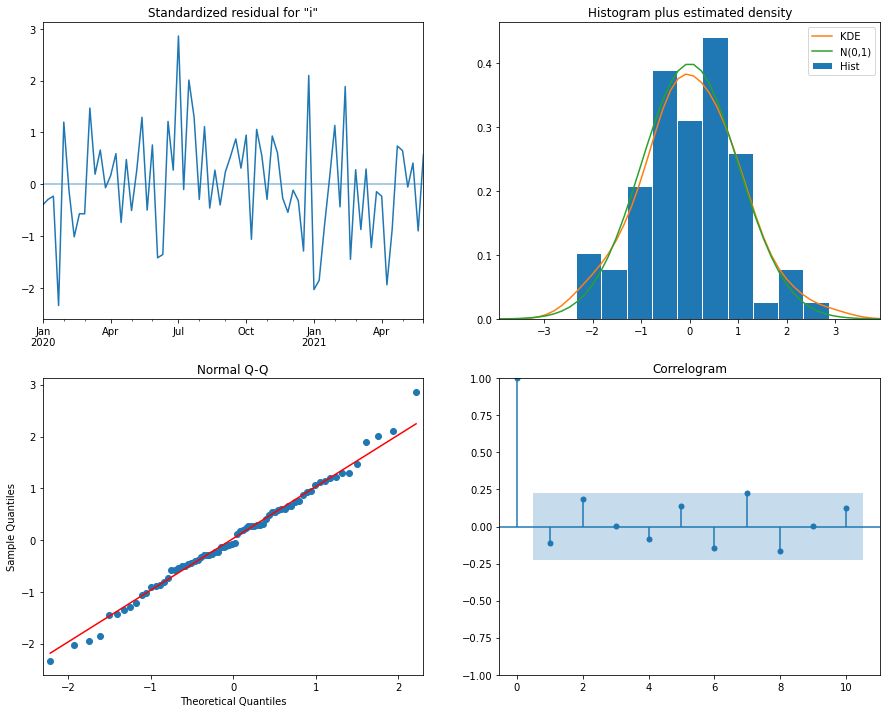

In [80]:
imp_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

<AxesSubplot:xlabel='date'>

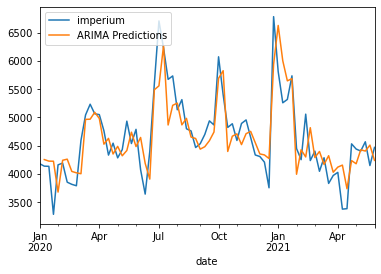

In [121]:
start=1
end=len(imp_df)-1
pred=imp_fit.predict(start=start,end=end,typ='levels', exog = exogx, dynamic=False).rename('ARIMA Predictions')

imp_df.plot(legend = True)
pred.plot(legend=True)

In [122]:
import numpy as np

actual = imp_df[1:74]

def MAPE(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [123]:
MAPE(actual, pred)

6.960990817439389

In [124]:
len(pred)

73

In [125]:
len(imp_df)

74

In [126]:
print(pred)

2020-01-13    4253.792227
2020-01-20    4226.147821
2020-01-27    4224.219142
2020-02-03    3677.759963
2020-02-10    4240.934363
                 ...     
2021-05-03    4179.502227
2021-05-10    4426.848454
2021-05-17    4404.347193
2021-05-24    4509.781670
2021-05-31    4239.123653
Freq: W-MON, Name: ARIMA Predictions, Length: 73, dtype: float64


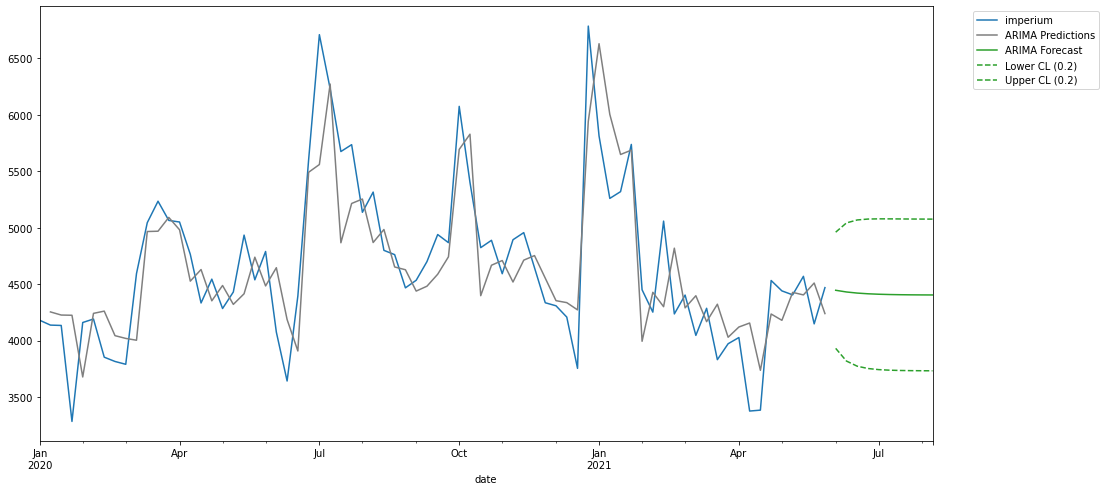

In [233]:
exogx2 = evedata_df[['northern_conflict', "war_begins", "fwst", "m2", "1dq_siege", "1dq_ongoing"]].iloc[75:85]


forecast=imp_fit.forecast(steps = 10, exog = exogx2).rename('ARIMA Forecast')
forecast2 = imp_fit.get_forecast(steps = 10, exog = exogx2, alpha = 0.2)
yhat = forecast2.predicted_mean
yhat_conf_int = forecast2.conf_int(alpha=0.2)

plt.rcParams["figure.figsize"] = (16,8)

imp_df.plot(legend = True, color = "tab:blue")
pred.plot(legend=True, color = "tab:grey")
forecast.plot(legend=True, color = "tab:green")
yhat_conf_int["lower imperium"].plot(legend=True, color = "tab:green", linestyle = "dashed", label = "Lower CL (0.2)")
yhat_conf_int["upper imperium"].plot(legend=True, color = "tab:green", linestyle = "dashed", label = "Upper CL (0.2)")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.rcParams["figure.figsize"] = (20,3)

In [201]:
print(forecast)

2021-06-07    4445.492355
2021-06-14    4430.379451
2021-06-21    4420.663468
2021-06-28    4414.417130
2021-07-05    4410.401402
2021-07-12    4407.819717
2021-07-19    4406.159970
2021-07-26    4405.092930
2021-08-02    4404.406937
2021-08-09    4403.965917
Freq: W-MON, Name: ARIMA Forecast, dtype: float64


In [197]:
print(yhat_conf_int)

            lower imperium  upper imperium
2021-06-07     3658.729112     5232.255598
2021-06-14     3495.053414     5365.705488
2021-06-21     3430.423208     5410.903729
2021-06-28     3402.350064     5426.484196
2021-07-05     3389.449343     5431.353460
2021-07-12     3383.217892     5432.421543
2021-07-19     3380.053445     5432.266496
2021-07-26     3378.365139     5431.820721
2021-08-02     3377.422480     5431.391395
2021-08-09     3376.875395     5431.056440


In [133]:
print(evedata_df[['northern_conflict', "war_begins", "fwst", "m2", "1dq_siege", "1dq_ongoing"]].iloc[75:90])

            northern_conflict  war_begins  fwst  m2  1dq_siege  1dq_ongoing
date                                                                       
2021-06-14                  0           0     0   0          0            1
2021-06-21                  0           0     0   0          0            1
2021-06-28                  0           0     0   0          0            1
2021-07-05                  0           0     0   0          0            1
2021-07-12                  0           0     0   0          0            1
2021-07-19                  0           0     0   0          0            1
2021-07-26                  0           0     0   0          0            1
2021-08-02                  0           0     0   0          0            1
2021-08-09                  0           0     0   0          0            1
2021-08-16                  0           0     0   0          0            1
